# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>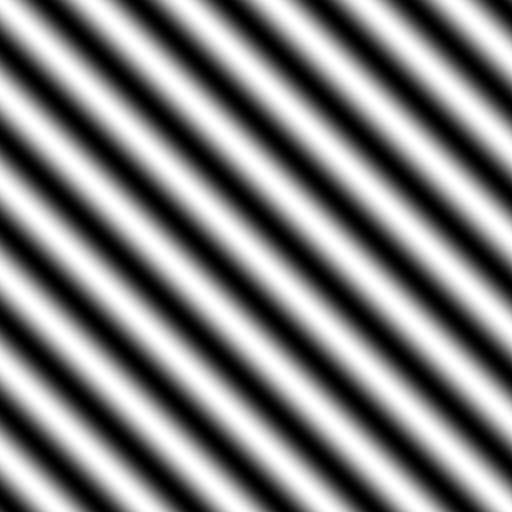</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

In [2]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+np.abs(fftshift(If)))

def thresholdImage(I,s):
    """ Array*int -> Array """
    J = np.copy(I)
    J = np.where(J>=s,255,0)
    return J


1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `T_e=1`.


<IPython.core.display.Javascript object>


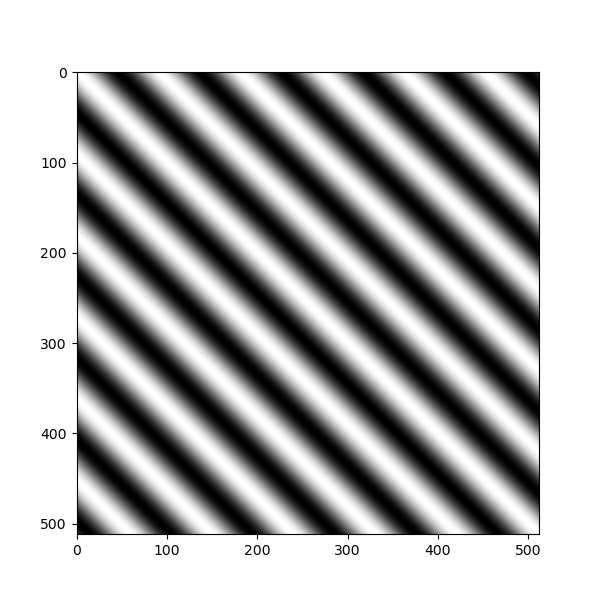

In [3]:
s45 = sinusoid2d(1,45,512,64,1)
imshow(s45, title=None)

2. What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ is the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

### Answer

In direction $t$ we have $f_t^{\text{max}}$ = $f_0*cos(\theta)$ and in direction $u$ we have $f_u^{\text{max}}$ = $f_0*sin(\theta)$. And since we have $\theta=\frac\pi4$, $cos(\theta)$ = $sin(\theta)$ = $\frac{\sqrt2}{2}$.

So $fm = f_0*cos(\theta) = f_0*sin(\theta) =  f_0* \frac{\sqrt2}{2}$

We have to multiply the limit frequency by atleast 2 according to Shannon to get an acceptable sample. And that's because the coefficient of 2 or more allows the computation of Fourier Transform without the interference of the FT replicas. ( No overlapping ).

2. (a)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


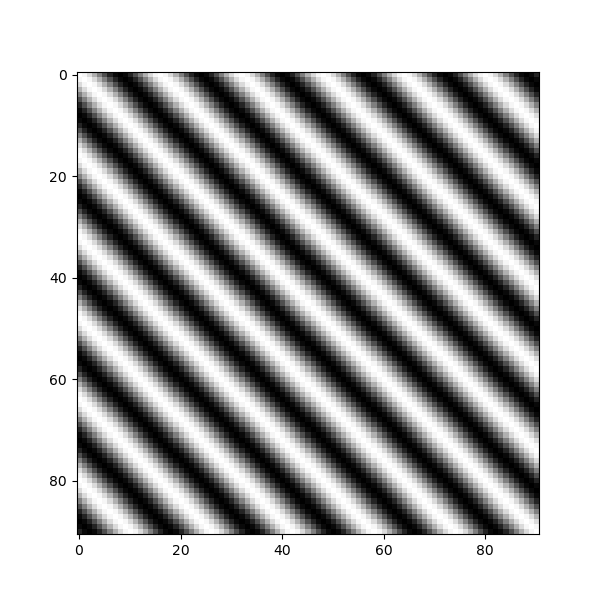

In [4]:
T0 = 64 #Fundamental period
f0 = 1/T0 #Original frequency
fm = f0 * np.sqrt(2)/2 #Maximal frequency
fe = 16 * fm #Sampling frequency
Te = 1/fe #Sampling period

s45sampled16 = sinusoid2d(1,45,512,T0,Te)
imshow(s45sampled16)

2. (b) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

<IPython.core.display.Javascript object>


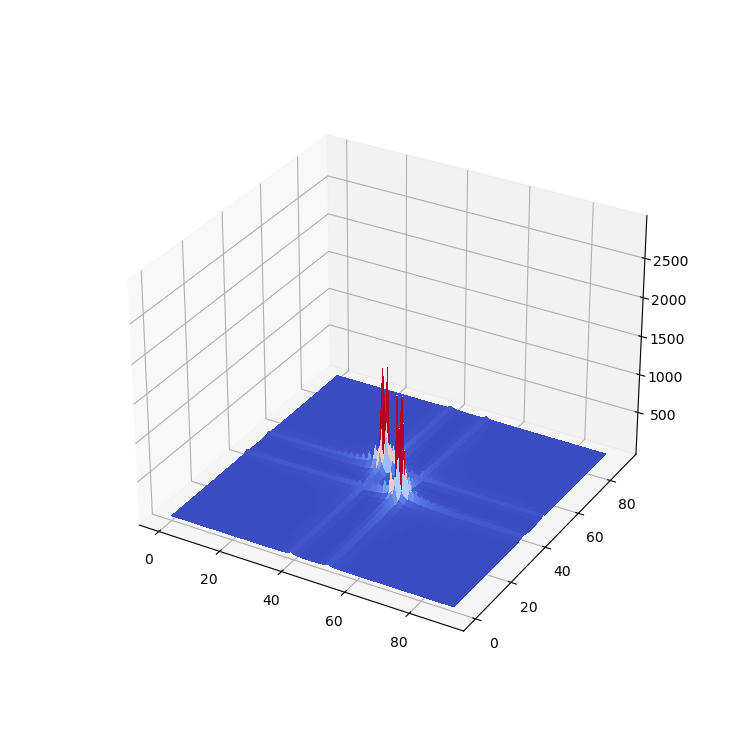

In [5]:
s45sampled16FT = computeFT(s45sampled16)
s45sampled16FTModule = toVisualizeFT(s45sampled16FT)
surf(s45sampled16FTModule)

2. (c) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

<IPython.core.display.Javascript object>


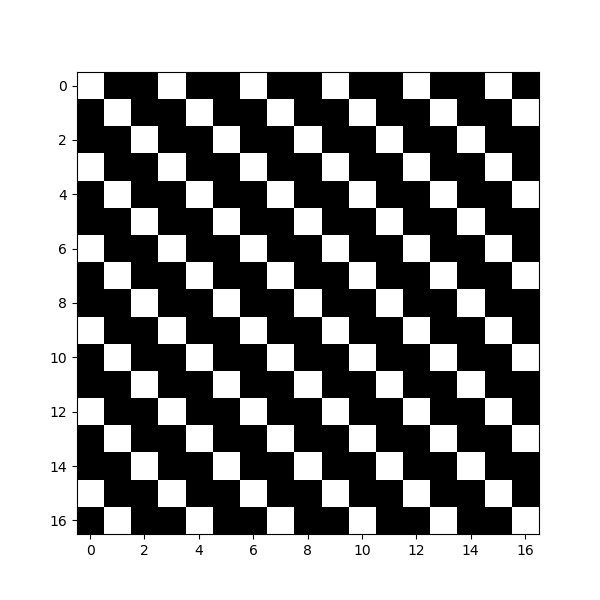

<IPython.core.display.Javascript object>


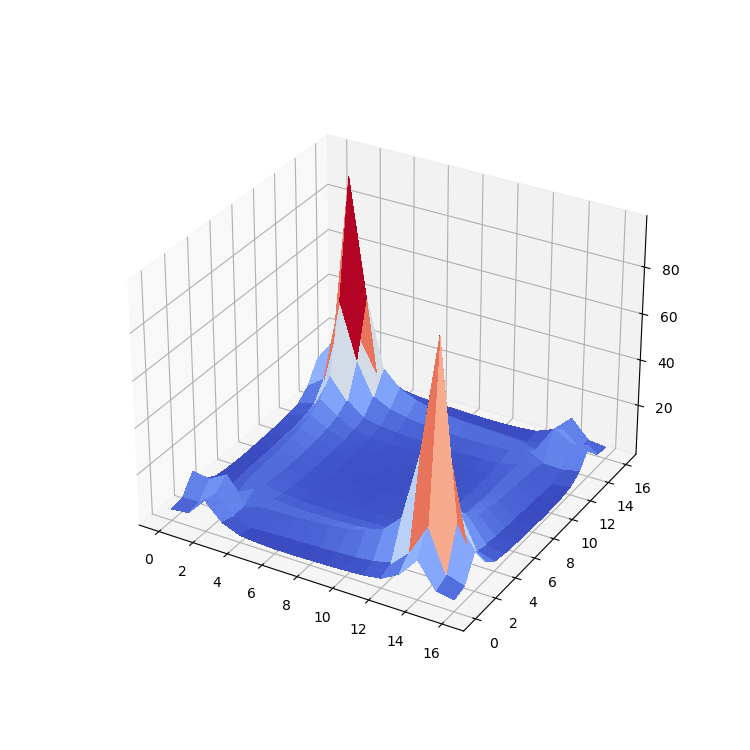

In [6]:
#Since 2 * fm is the limit, we're going to use higher coefficients in our experimentations

#Experiment n°1
fe = 3 * fm
Te = 1/fe

#Sampling
s45sampled3 = sinusoid2d(1,45,512,T0,Te)
imshow(s45sampled3)


#Fourier Spectrum
s45sampled3FT = computeFT(s45sampled3)
s45sampled3FTModule = toVisualizeFT(s45sampled3FT)
surf(s45sampled3FTModule)

<IPython.core.display.Javascript object>


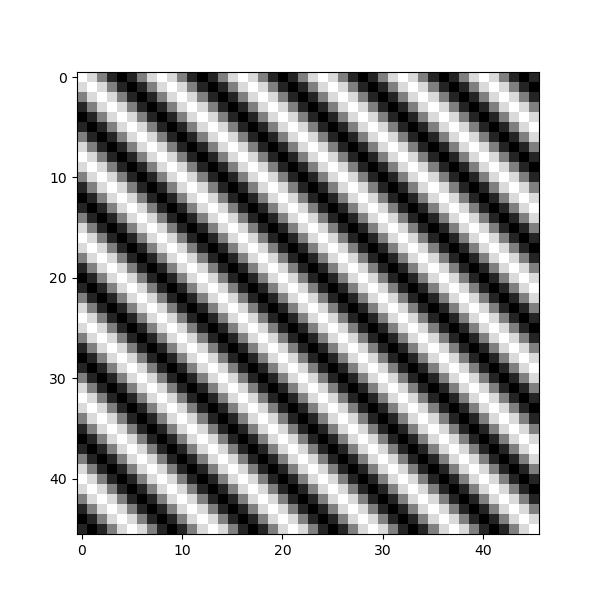

<IPython.core.display.Javascript object>


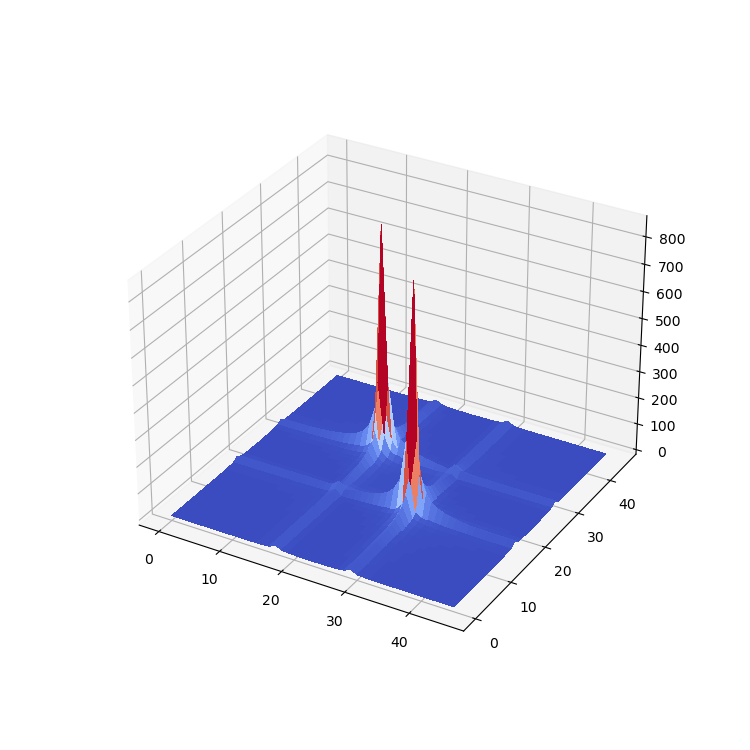

In [7]:
#Experiment n°2
fe = 8 * fm
Te = 1/fe

#Sampling
s45sampled8 = sinusoid2d(1,45,512,T0,Te)
imshow(s45sampled8)

#Fourier Spectrum
s45sampled8FT = computeFT(s45sampled8)
s45sampled8FTModule = toVisualizeFT(s45sampled8FT)
surf(s45sampled8FTModule)

<IPython.core.display.Javascript object>


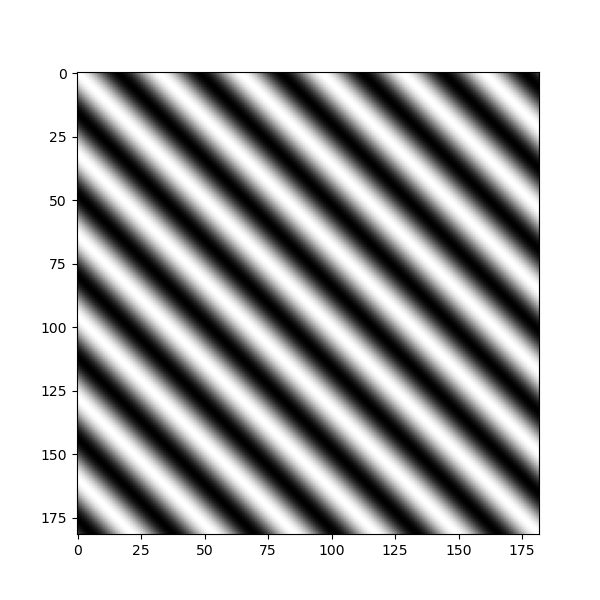

<IPython.core.display.Javascript object>


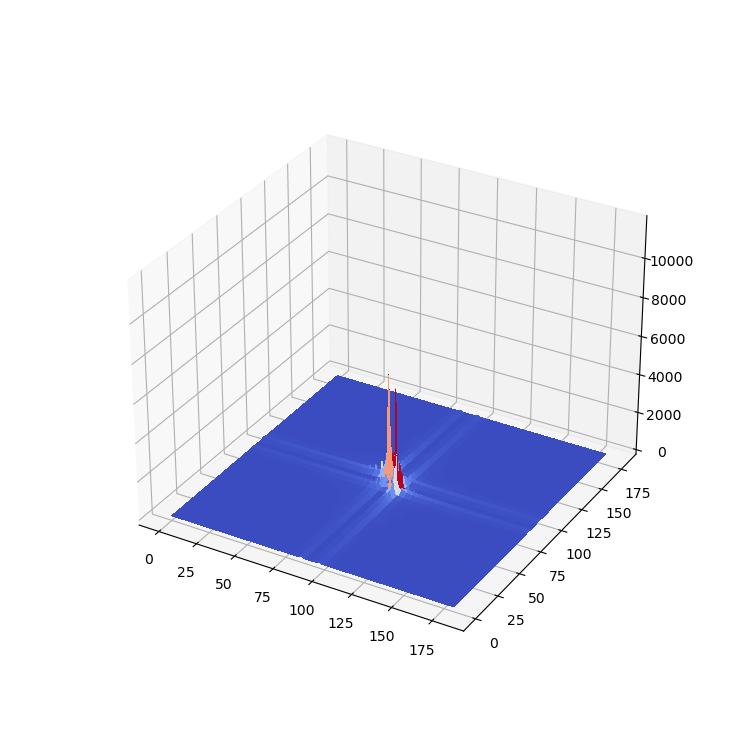

In [8]:
#Experiment n°3
fe = 32 * fm
Te = 1/fe

#Sampling
s45sampled2 = sinusoid2d(1,45,512,T0,Te)
imshow(s45sampled2)

#Fourier Spectrum
s45sampled2FT = computeFT(s45sampled2)
s45sampled2FTModule = toVisualizeFT(s45sampled2FT)
surf(s45sampled2FTModule)

### Answer to (c):

-As it is displayed above, the two Dirac peaks are always present and noticeable.

-The more we use higher sampling frequencies the more we're getting more precise in sampling. This is noticeable by the narrowness of the Dirac peaks as they get thinner when we use high sampling frequencies(for ex: 32) and wider when we use low sampling frequencies(for ex: 3)

<IPython.core.display.Javascript object>


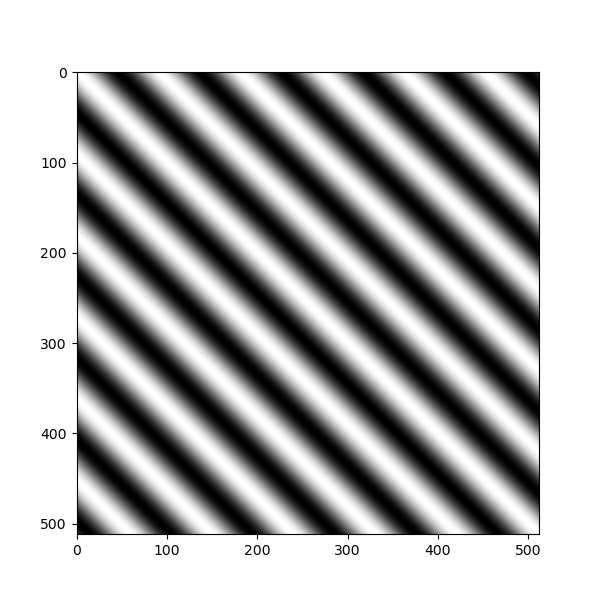

In [9]:
imshow(s45)

### Bonus section (c)

The lobes that we are noticing around the peaks are due to the overlap of sinc functions onto the spectrum. And that is because of the representation paradigm that is not able to show an "actual" Dirac distribution. 

<IPython.core.display.Javascript object>


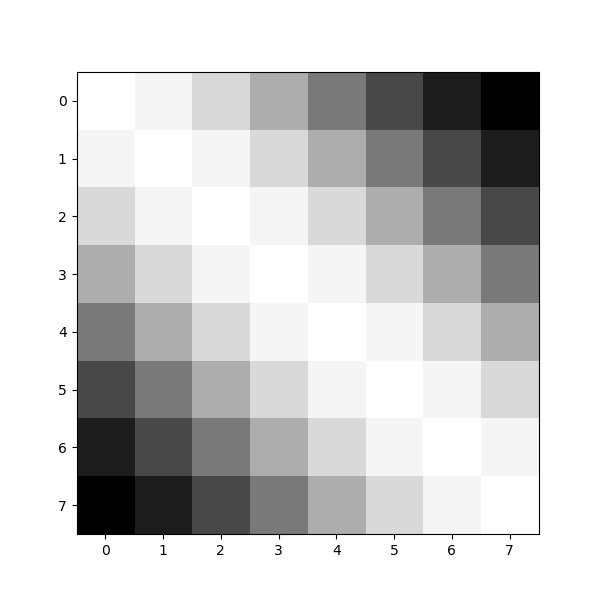

<IPython.core.display.Javascript object>


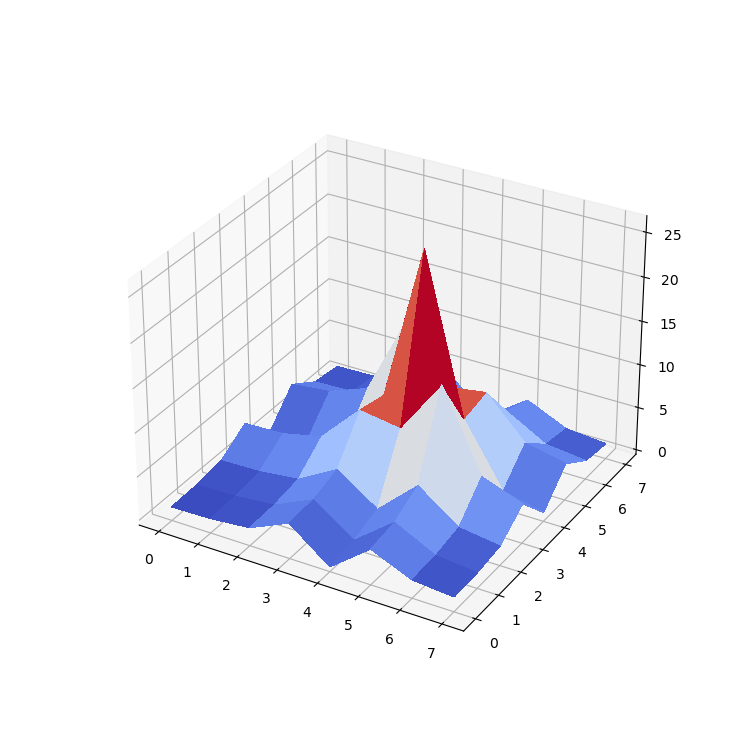

In [10]:
#Let's increase T0
#T0 = 500
#T0 = 600
#T0 = 700
T0 = 800 #Fundamental period
f0 = 1/T0 #Original frequency
fm = f0 * np.sqrt(2)/2 #Maximal frequency
fe = 16 * fm #Sampling frequency
Te = 1/fe #Sampling period

s45sampled16Test = sinusoid2d(1,45,512,T0,Te)
imshow(s45sampled16Test)

s45sampled16TestFT = computeFT(s45sampled16Test)
s45sampled16TestFTModule = toVisualizeFT(s45sampled16TestFT)
surf(s45sampled16TestFTModule)

Excessively large periods lead to excessively low frequencies. In that case, whatever the sampling rate is, the distance between two samples from the signal will be too small to be shown. The Dirac peaks will therefore fuse into a single one.

And it doesn't matter if we use high sampling frequencies or not, here's the proof:

<IPython.core.display.Javascript object>


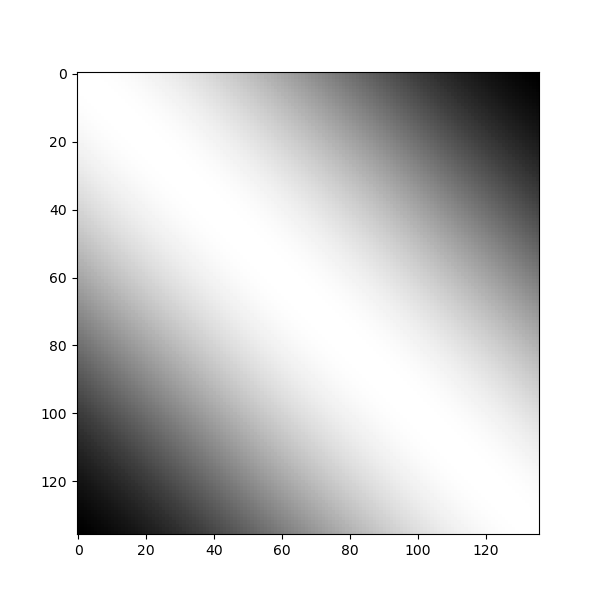

<IPython.core.display.Javascript object>


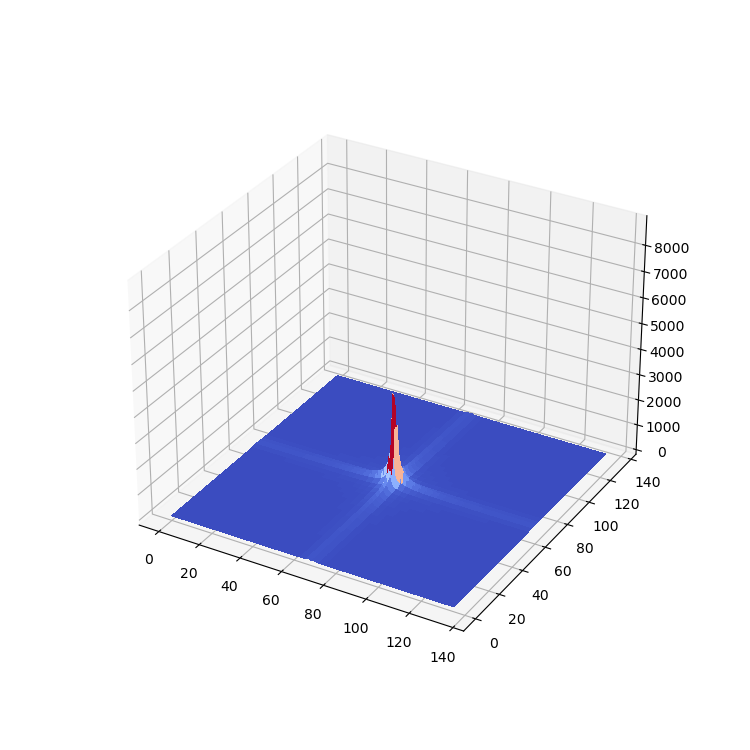

In [11]:
fe = 300 * fm
Te = 1/fe 

s45sampled300 = sinusoid2d(1,45,512,T0,Te)
imshow(s45sampled300)

s45sampled300FT = computeFT(s45sampled300)
s45sampled300FTModule = toVisualizeFT(s45sampled300FT )
surf(s45sampled300FTModule)

3. (a) Sample $s_{45}$ with $f_0=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


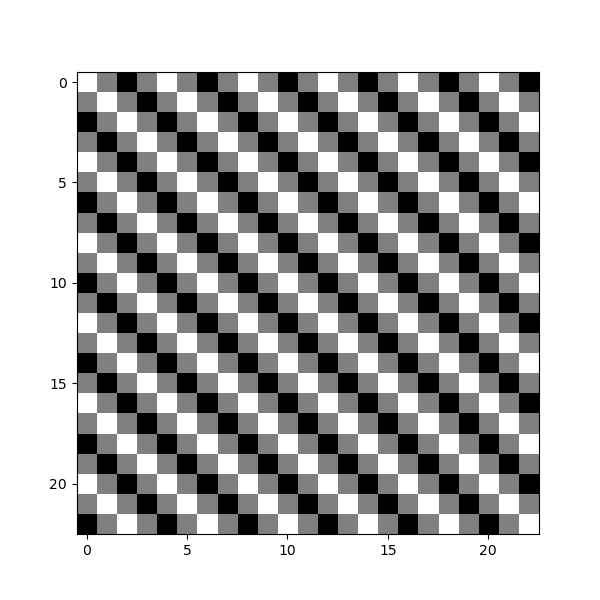

<IPython.core.display.Javascript object>


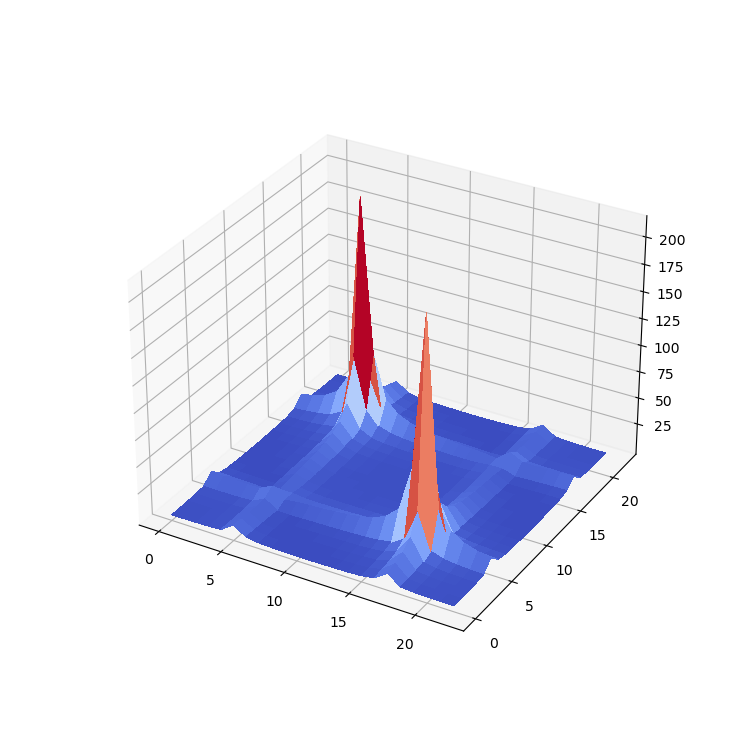

In [12]:
T0 = 64
f0 = 1/T0 #Original frequency
fm = f0 * np.sqrt(2)/2 #Maximal frequency
fe = 4 * fm #Sampling frequency
Te = 1/fe

s45sample4 = sinusoid2d(1,45,512,T0,Te)
imshow(s45sample4)

s45sample4FT = computeFT(s45sample4)
s45sample4FTModule = toVisualizeFT(s45sample4FT)
surf(s45sample4FTModule)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [13]:
def error(xd,xr,A,L):
    sum = 0
    for k in range(L):
        for i in range(L):
            sum += np.abs(xr[k,i] - xd[k,i])
            
    Er = (1/(2*A*L**2)) * sum
    
    return Er



3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

<IPython.core.display.Javascript object>


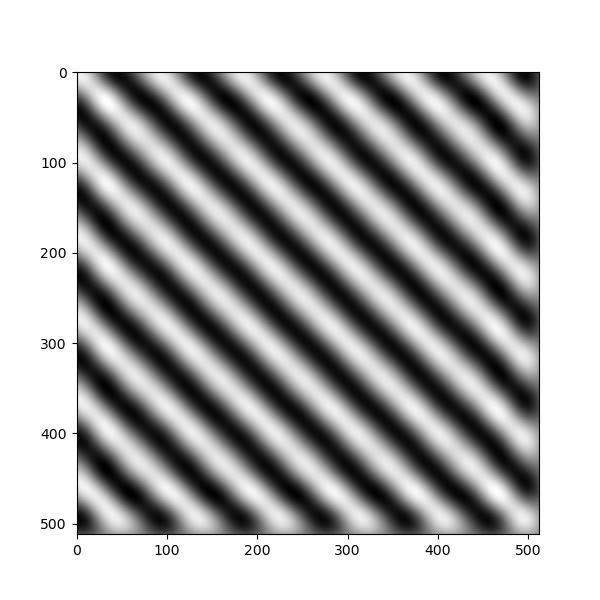

<IPython.core.display.Javascript object>


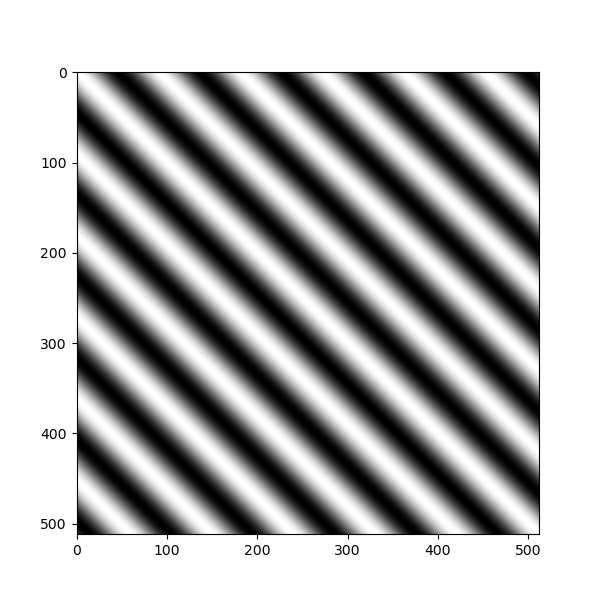

Error:  0.022936924363102615


In [14]:
#Reconstruct the sampled signal and display it
reconstructedS45 = shannonInterpolation(s45sample4, Te, 512)
imshow(reconstructedS45)

#Display The Original Signal 
imshow(s45)


Er = error(s45, reconstructedS45, 1, 512)
print('Error: ', Er)

The origin of this error is due the nature of sampling. As the latter results to information loss when reconstructing the signal. But since in this case (4*fm) Shannon condition is valid, this loss can be ignored and even better, it can become less and less insignificant if we increase the coefficient.

4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

<IPython.core.display.Javascript object>


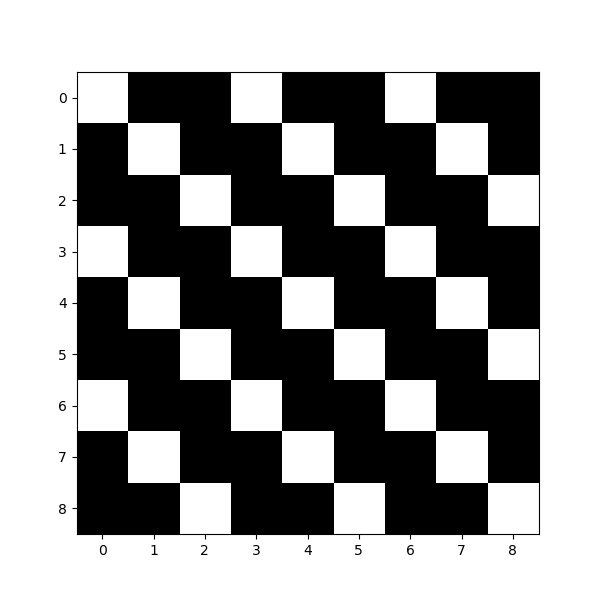

<IPython.core.display.Javascript object>


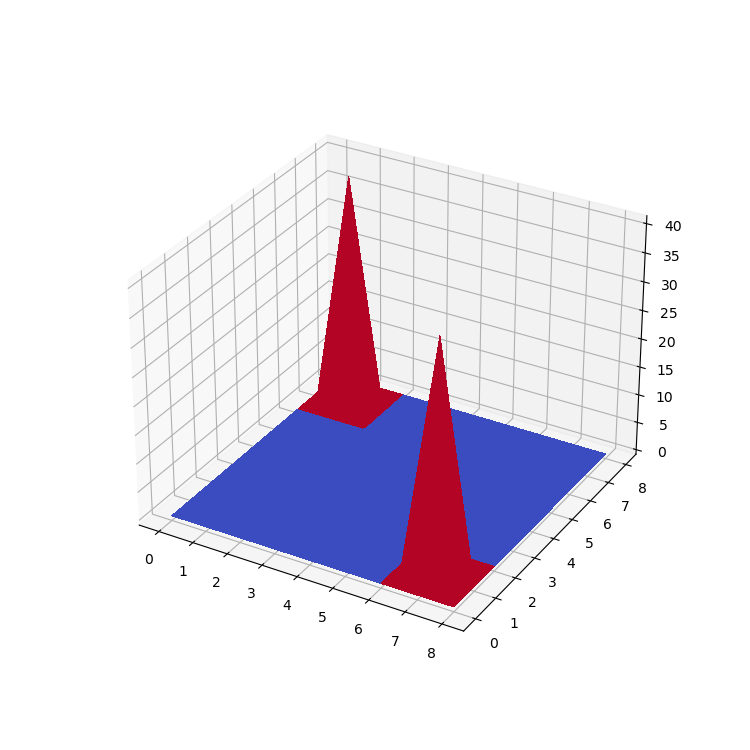

In [15]:
fe = 1.5 * fm #Sampling frequency
Te = 1/fe

s45sample1p5 = sinusoid2d(1,45,512,T0,Te)
imshow(s45sample1p5)

s45sample1p5FT = computeFT(s45sample1p5)
s45sample1p5FTModule = toVisualizeFT(s45sample1p5FT)
surf(s45sample1p5FTModule)

The program couldn't fully reconstruct the signal because the sampling frequency is low. And mostly, it doesn't meet Shannon law, which resulted to aliasing.

And by definition, the aliasing is due to the inability to distinguish different signals and more precisely, their Fourier transforms. (Overlap).

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

In direction $t$ we have $f_t^{\text{max}}$ = $f_0*cos(\theta)$ and in direction $u$ we have $f_u^{\text{max}}$ = $f_0*sin(\theta)$. And since we have $\theta=10°$,  so $cos(\theta)$ > $sin(\theta)$.

So $fm = f_0*cos(\theta)$

<ipython-input-1-3605890aacb2>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(500//80,500//80))


<IPython.core.display.Javascript object>


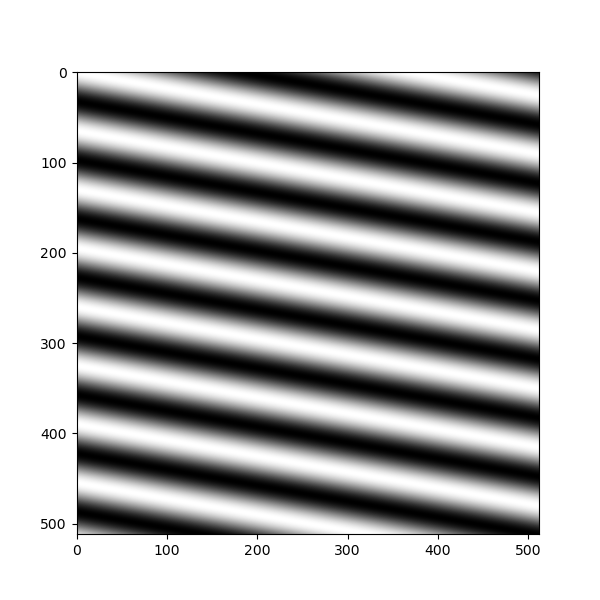

<IPython.core.display.Javascript object>


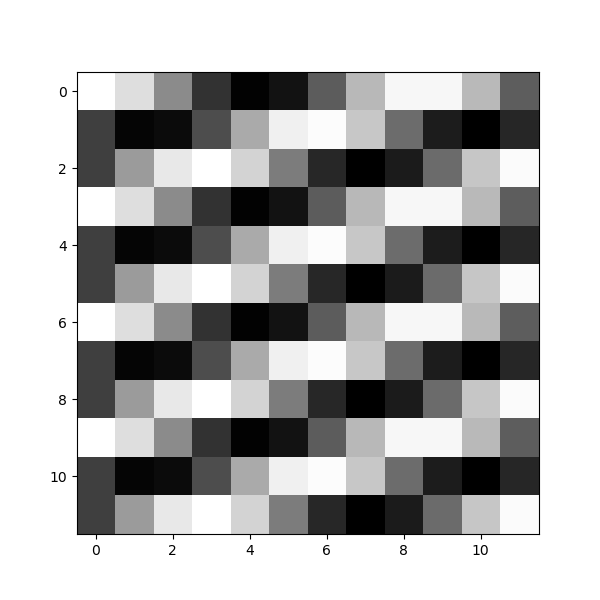

<IPython.core.display.Javascript object>


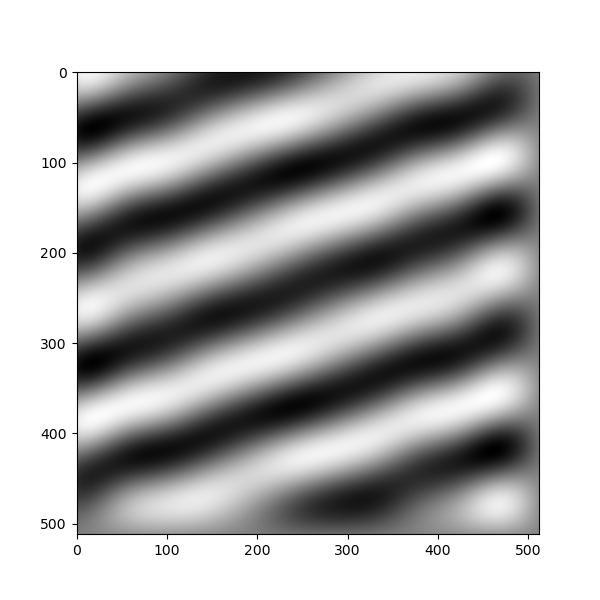

Error:  0.3982390747439338


In [16]:
T0 = 64

#Signal S10
s10 = sinusoid2d(1,10,512,T0,1)
imshow(s10)

f0 = 1/T0 #Original frequency
fm = f0 * np.cos(np.deg2rad(10))#Maximal frequency
fe = 1.5 * fm #Sampling frequency
Te = 1/fe


#Signal S10 sampled
s10sample1p5 = sinusoid2d(1,10,512,T0,Te)
imshow(s10sample1p5)


#Reconstructing the signal
reconstructedS10 = shannonInterpolation(s10sample1p5, Te, 512)
imshow(reconstructedS10)

Er = error(s10, reconstructedS10, 1, 512)
print('Error: ',Er)

Since we had a sampling frequency that doesn't meet Shannon's law so the result of the reconstruction was messy and incorrect. It couldn't even keep the original orientation of the signal.

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [18]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below
def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def shannonInterpolationLoop(I, Te, size):
    Iprime = np.zeros((I.shape[0],I.shape[1]))
    
    for k in range(I.shape[0],I.shape[1]):
        for l in range(size):
            Iprime[k][l] += I[k*Te][l*Te] * np.sinc(I[k,l]-k*Te) * np.sinc(I[k,l]-l*Te)
    return Iprime



$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$

<IPython.core.display.Javascript object>


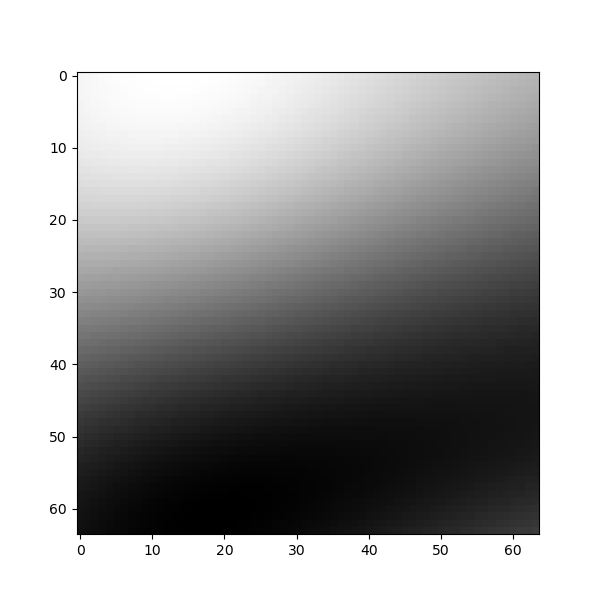

<IPython.core.display.Javascript object>


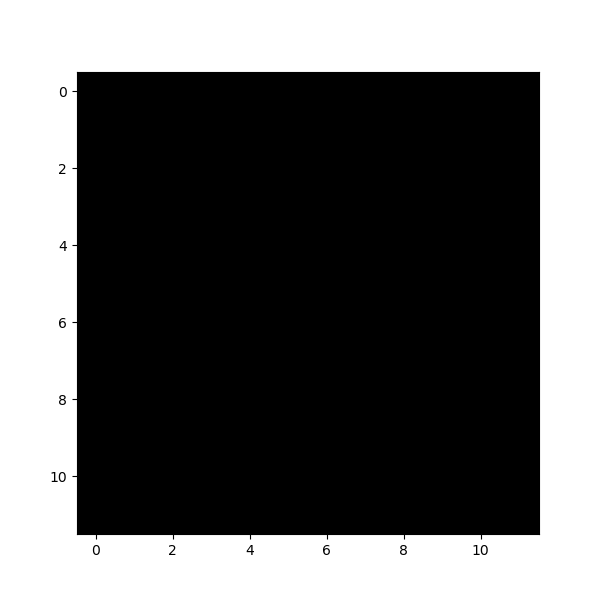

In [19]:
s10reconOri = shannonInterpolation(s10sample1p5, Te, 64)
imshow(s10reconOri)
s10reconLoop = shannonInterpolationLoop(s10sample1p5, Te, 64)
imshow(s10reconLoop)


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [19]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

Subsample of factor 2 means that we only keep one pixel out of two.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

<IPython.core.display.Javascript object>


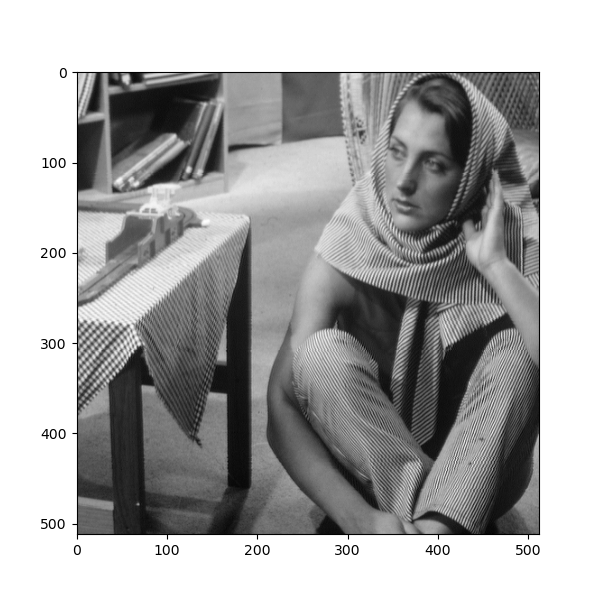

<IPython.core.display.Javascript object>


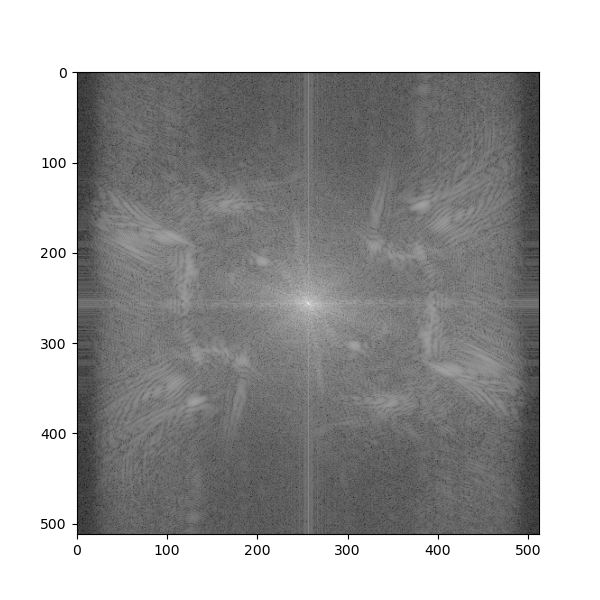

<IPython.core.display.Javascript object>


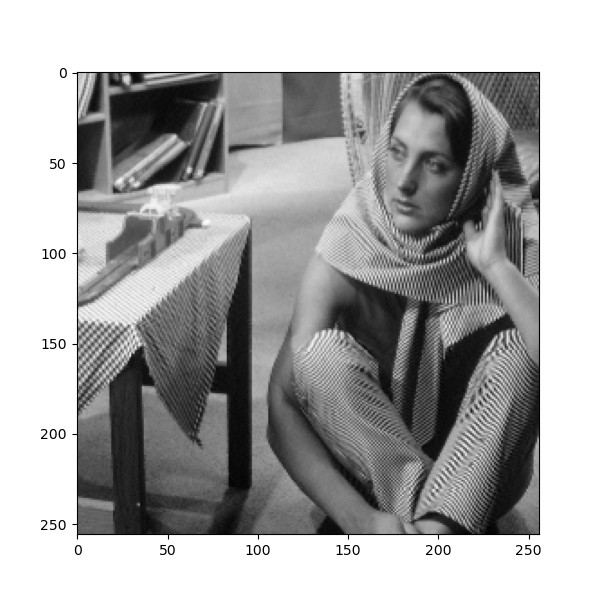

<IPython.core.display.Javascript object>


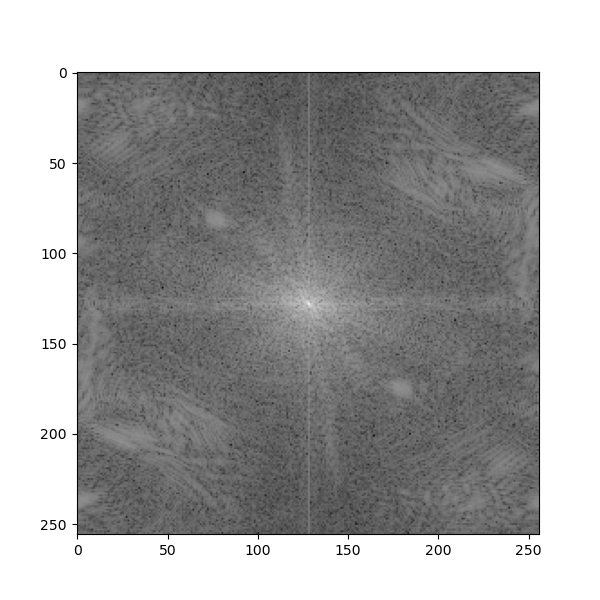

<IPython.core.display.Javascript object>


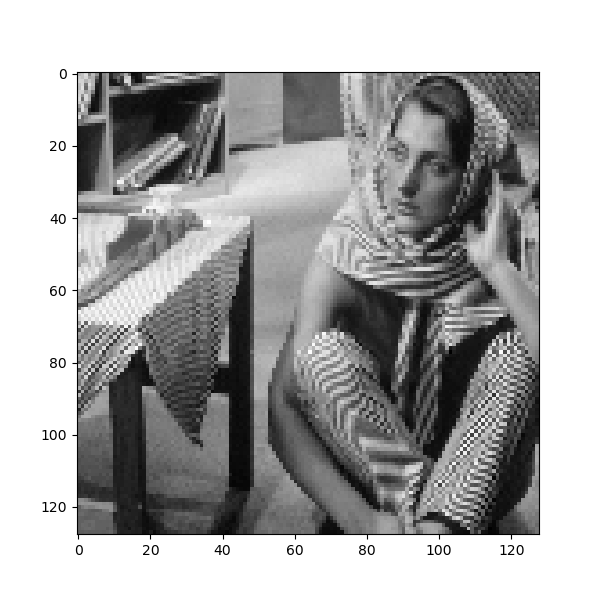

<IPython.core.display.Javascript object>


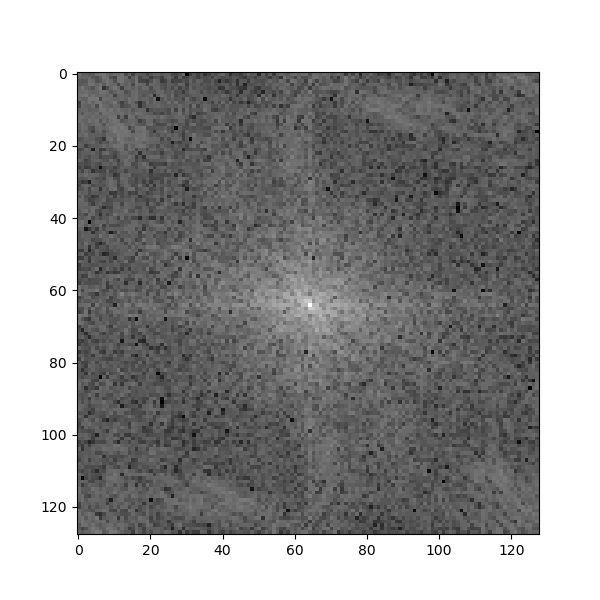

<IPython.core.display.Javascript object>


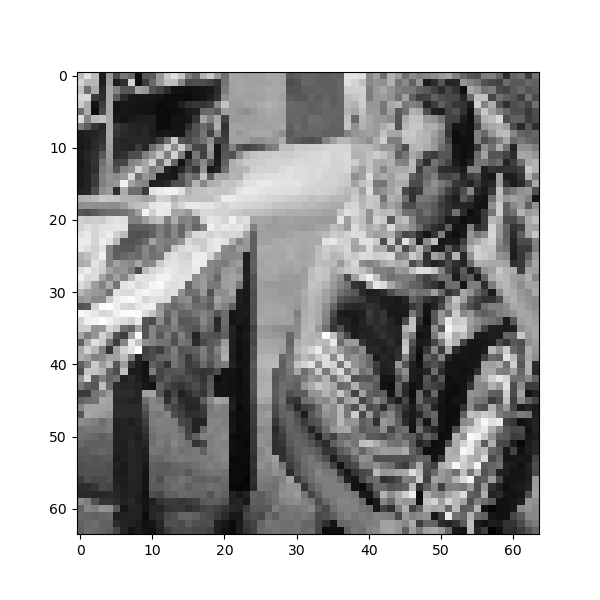

<IPython.core.display.Javascript object>


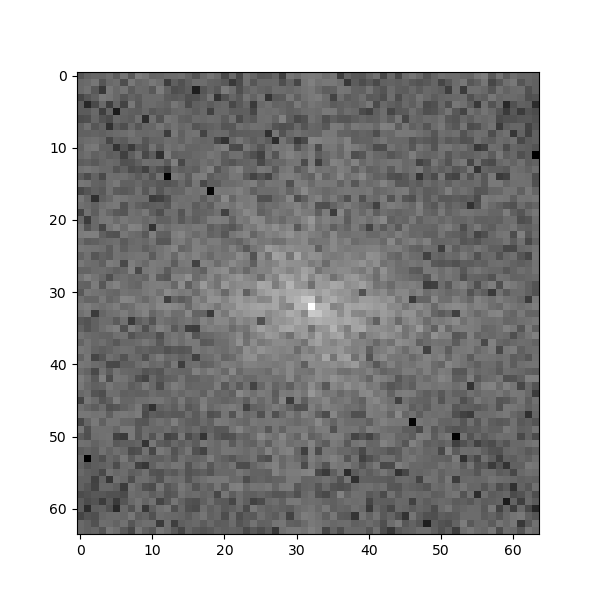

<IPython.core.display.Javascript object>


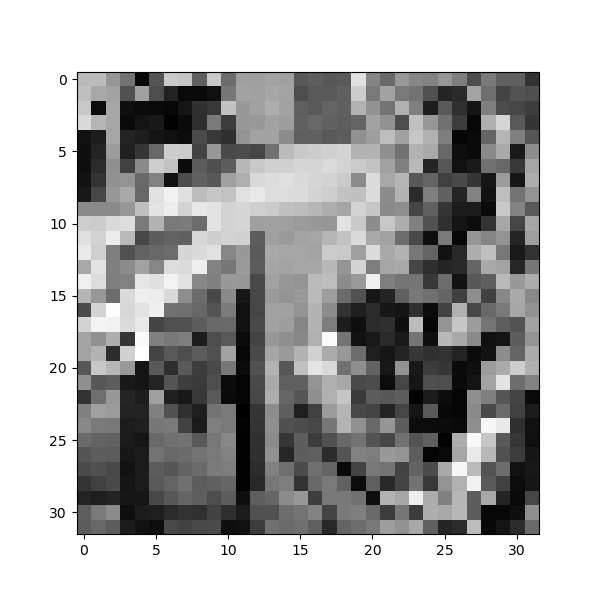

<IPython.core.display.Javascript object>


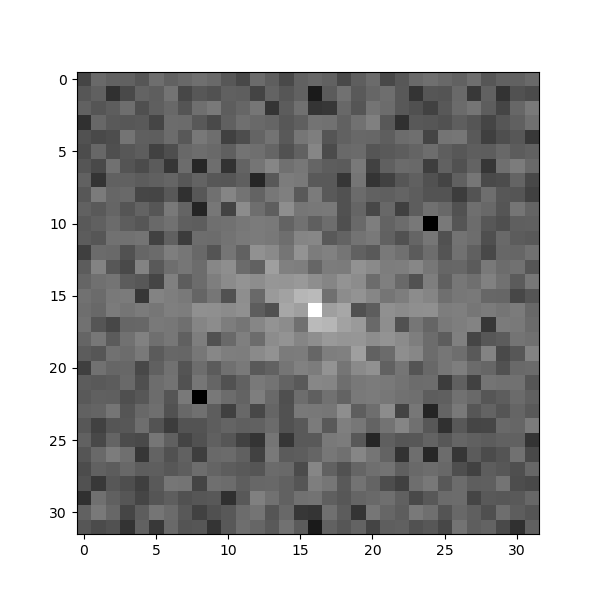

<IPython.core.display.Javascript object>


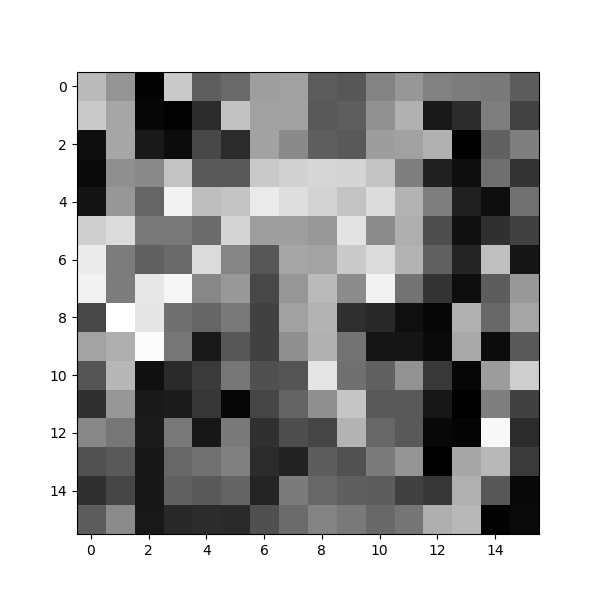

<IPython.core.display.Javascript object>


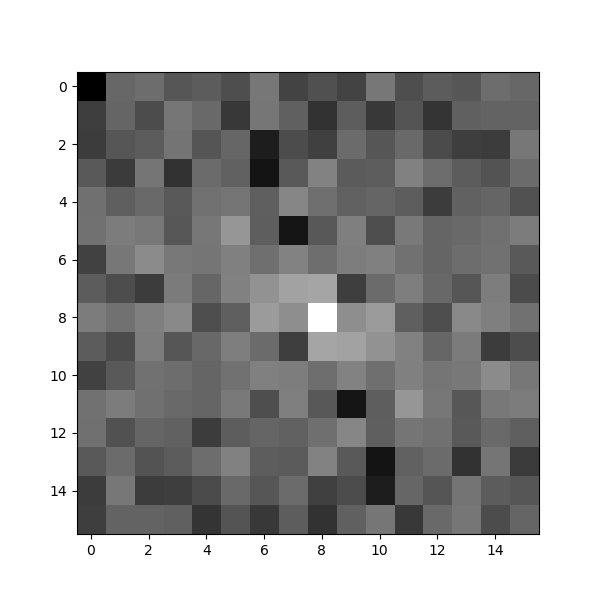

In [22]:
img = barbara.copy()
imgFT = computeFT(img)
imgFTMod = toVisualizeLogFT(imgFT)
imshow(img)
imshow(imgFTMod)


for i in range(5):
    img = subSample2(img)
    imgFT = computeFT(img)
    imgFTMod = toVisualizeLogFT(imgFT)
    imshow(img)
    imshow(imgFTMod)


Aliasing is a drawback because it makes images look unnatural (unrealistic) by adding jaggies, Moiré patterns which makes an image lose details.

3. Bonus question: same question with the image `img/mandrill.png`.

<IPython.core.display.Javascript object>


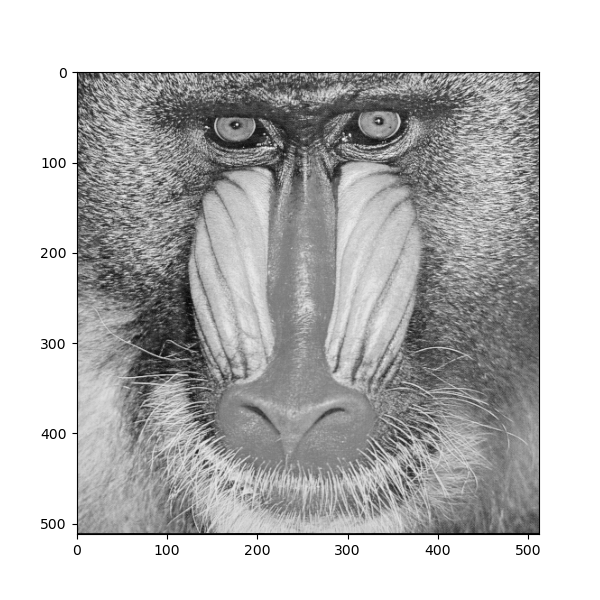

<IPython.core.display.Javascript object>


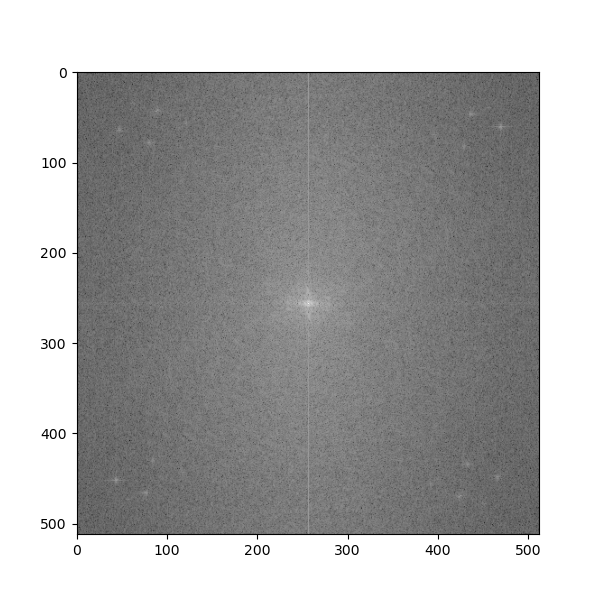

<IPython.core.display.Javascript object>


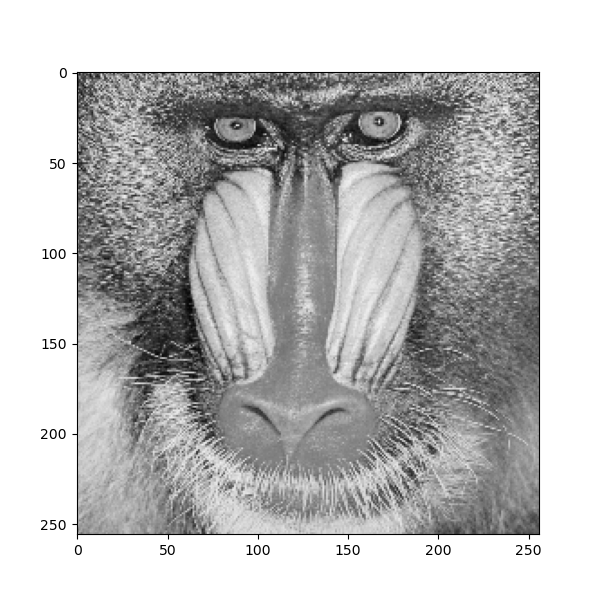

<IPython.core.display.Javascript object>


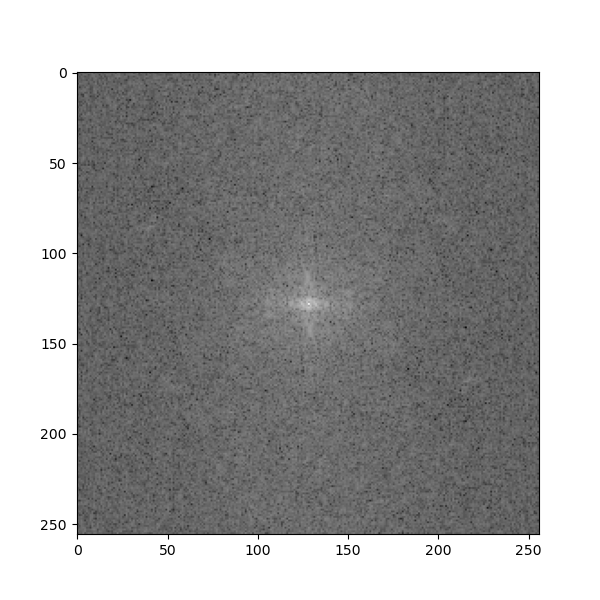

<IPython.core.display.Javascript object>


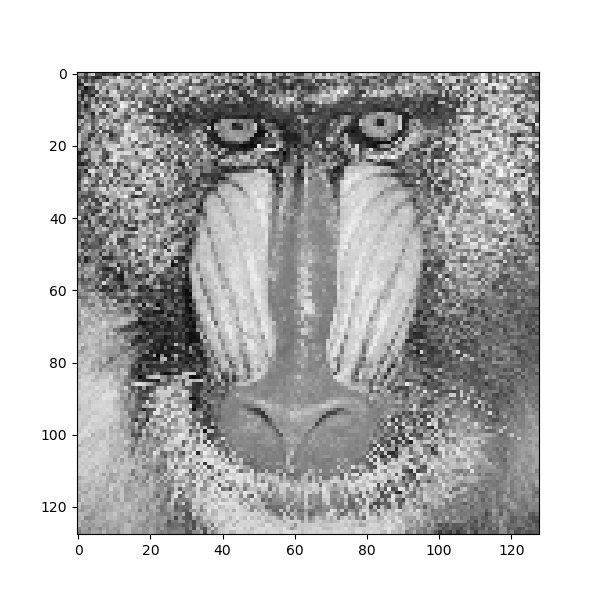

<IPython.core.display.Javascript object>


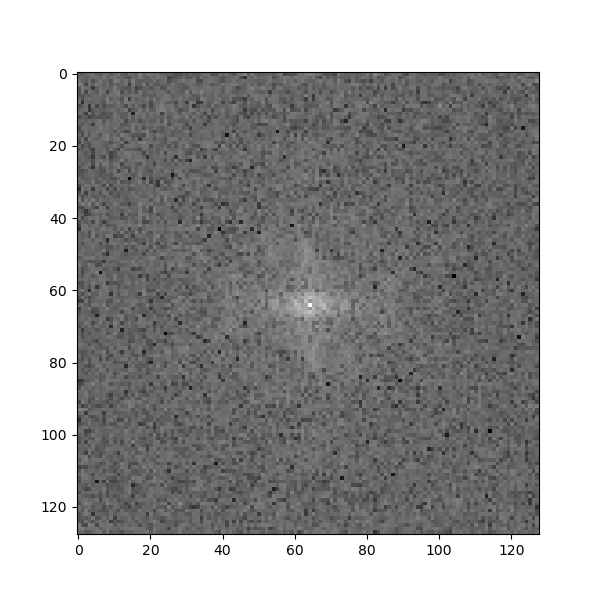

<IPython.core.display.Javascript object>


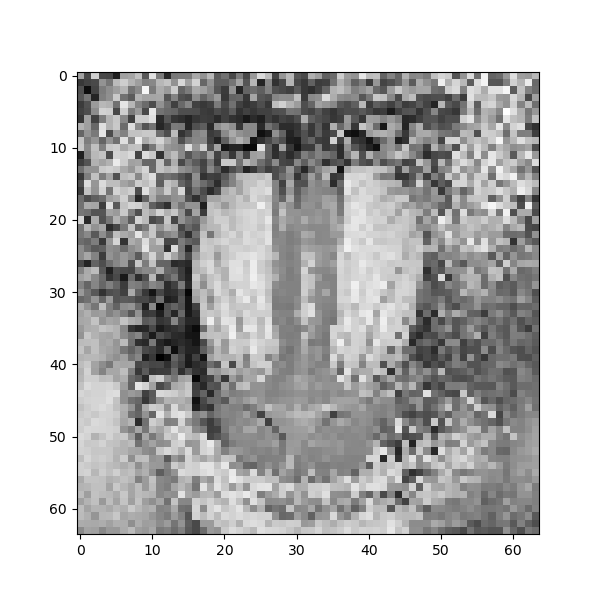

<IPython.core.display.Javascript object>


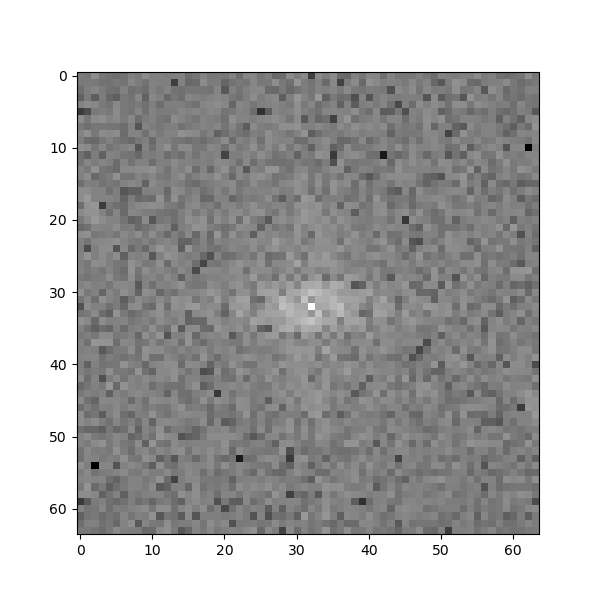

<IPython.core.display.Javascript object>


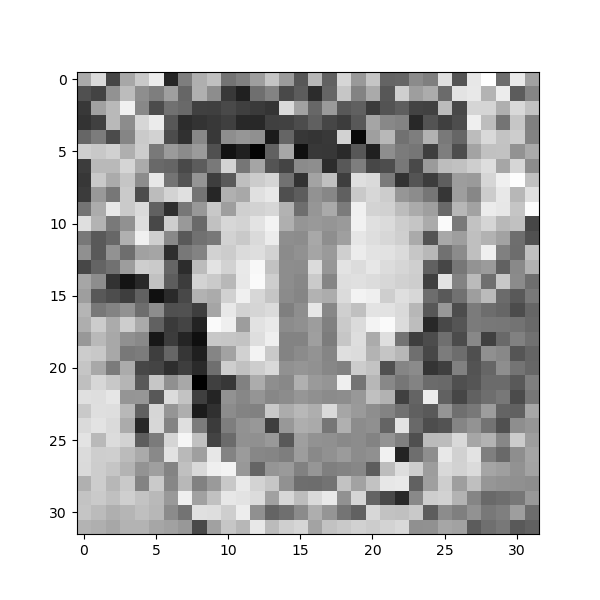

<IPython.core.display.Javascript object>


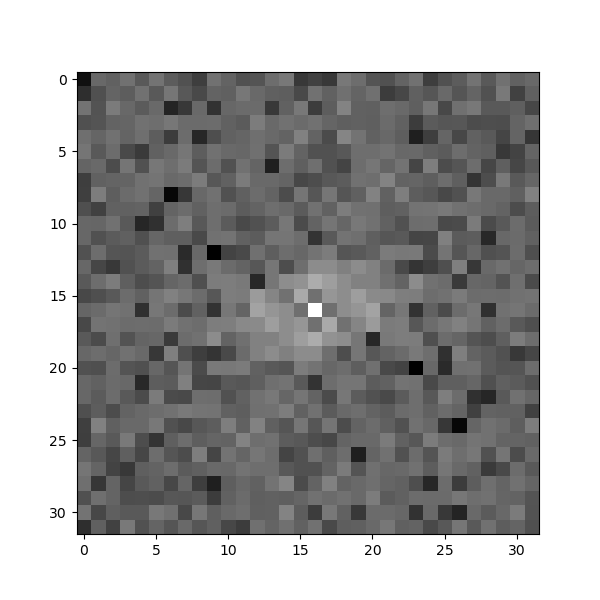

<IPython.core.display.Javascript object>


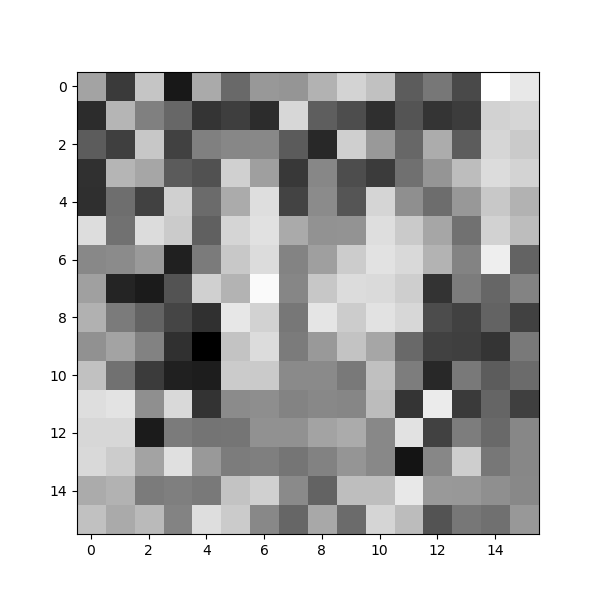

<IPython.core.display.Javascript object>


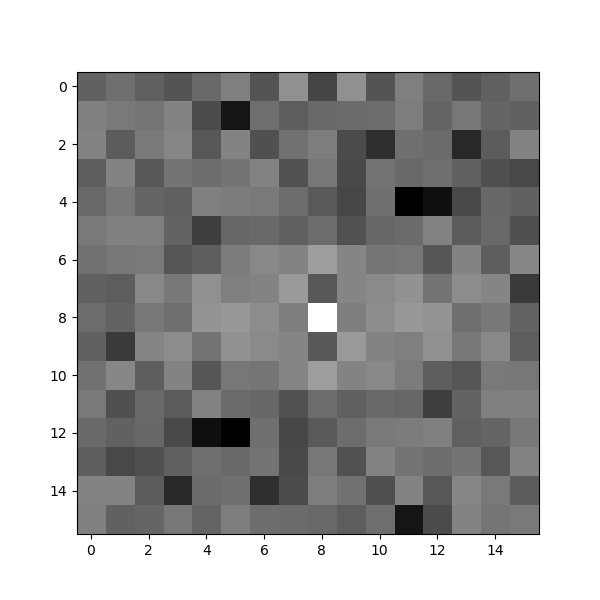

In [23]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below
img = mandrill.copy()
imgFT = computeFT(img)
imgFTMod = toVisualizeLogFT(imgFT)
imshow(img)
imshow(imgFTMod)


for i in range(5):
    img = subSample2(img)
    imgFT = computeFT(img)
    imgFTMod = toVisualizeLogFT(imgFT)
    imshow(img)
    imshow(imgFTMod)
